<font size="+3"><strong>Exploring the Data</strong></font>

In this project, we're going to work with data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and we'll work with an extract of the results from 2019.

# Prepare Data 

## Import

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 351 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the [data dictionary](./066-data-dictionary.ipynb) for this project for details and links to the official [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk.htm). For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the `"TURNFEAR"` column. 

In [4]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore

### Age

In [5]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [6]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = pd.Series(df_fear["AGECL"].replace(agecl_dict))
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

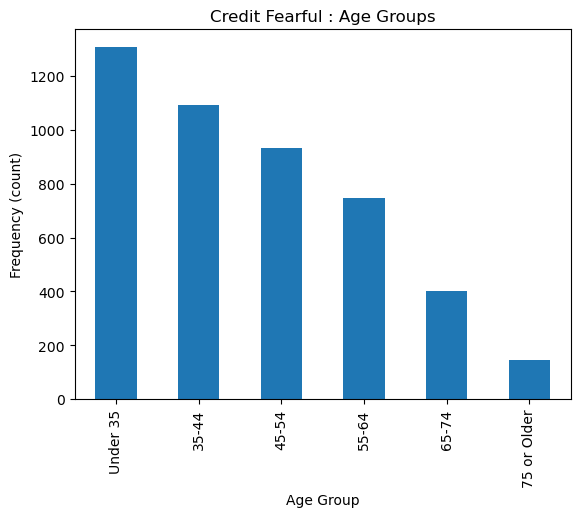

In [7]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful : Age Groups");

You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: `"AGE"`. Whereas `"AGECL"` was a categorical variable, `"AGE"` is continuous, so we can use it to make a histogram of our own.

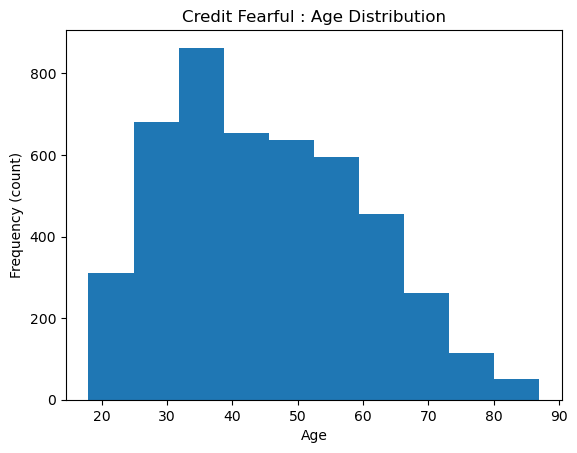

In [8]:
# Plot histogram of "AGE"
plt.hist(df_fear["AGE"], bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful : Age Distribution");

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40.

### Race

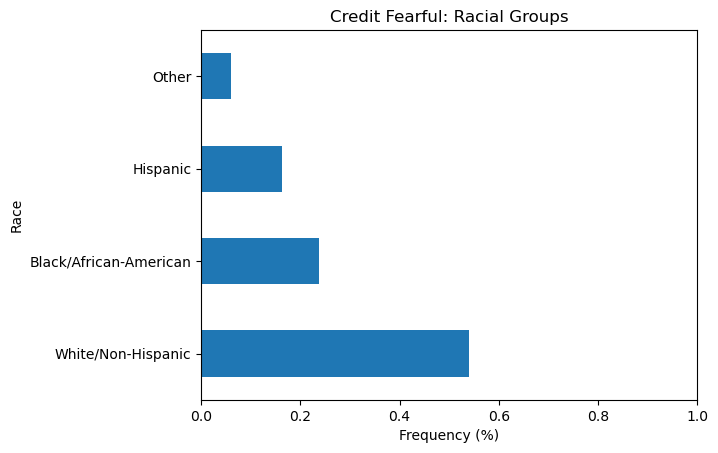

In [9]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = pd.Series(df_fear["RACE"].replace(race_dict))
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

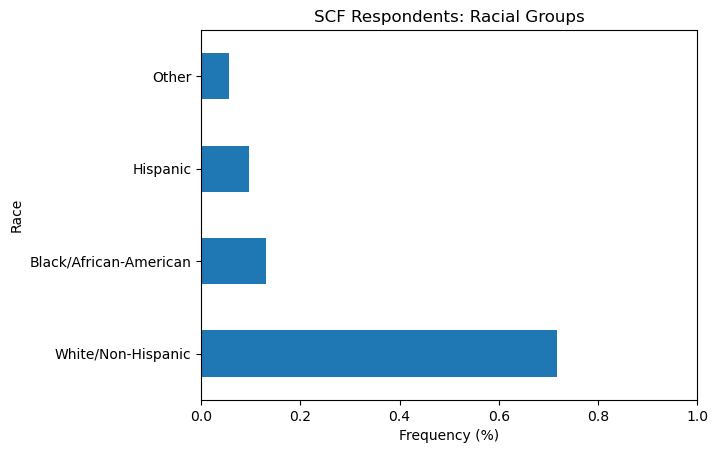

In [10]:
race = pd.Series(df["RACE"].replace(race_dict))
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, Black and Hispanic households are actually *more* likely to be in the credit fearful group. 

### Income

What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the "INCCAT" feature, which captures income percentile groups. This time, though, we'll make a single, side-by-side bar chart.



In [11]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)


df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


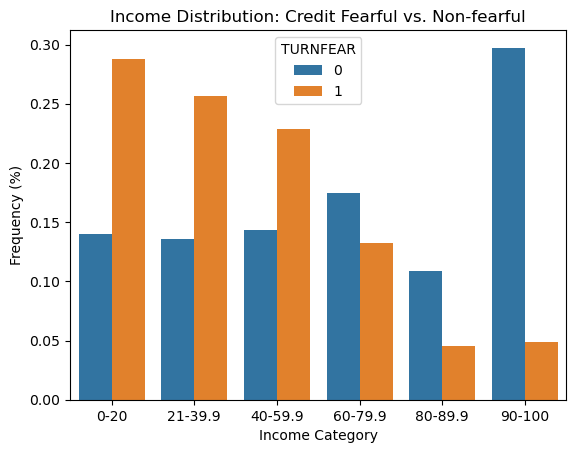

In [12]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue = "TURNFEAR",
    data=df_inccat,
    order = inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes. 

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

### Assets

In [13]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in our `TURNFEAR` subset, though? Let's run that correlation to see if there's a difference.

In [14]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735979152


Aha! They're different! It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our `TURNFEAR` group than it is for the population as a whole. 

Let's make correlation matrices using the rest of the data for both `df` and `df_fear` and see if the differences persist. Here, we'll look at only 5 features: `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"`, and `"EDUC"`.

In [15]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [16]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


Whoa! There are some pretty important differences here! The relationship between `"DEBT"` and `"HOUSES"` is positive for both datasets, but while the coefficient for `df` is fairly weak at 0.26, the same number for `df_fear` is 0.96. 

Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our `"TURNFEAR"` folks is their primary residence, which, again, is an intuitive finding. 

`"DEBT"` and `"ASSET"` share a similarly striking difference, as do `"EDUC"` and `"DEBT"` which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.

### Education

In [17]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


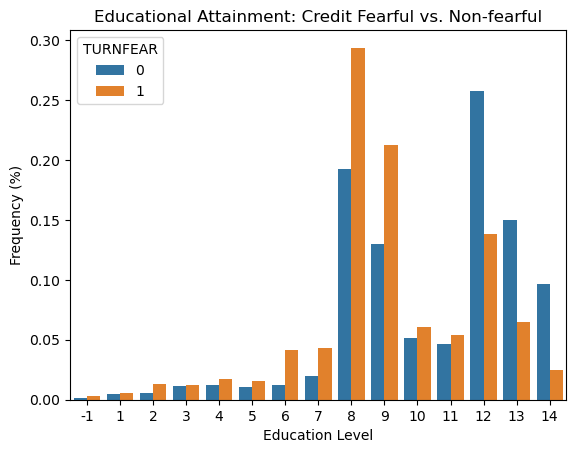

In [18]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue = "TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

### Debt

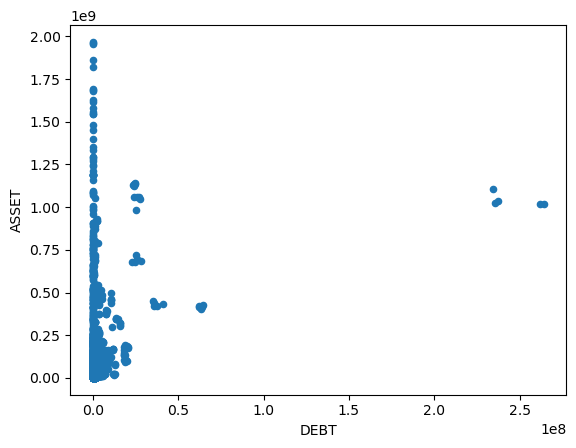

In [19]:
# Create scatter plot of ASSET vs DEBT, df
df.plot(kind="scatter", x="DEBT", y="ASSET");

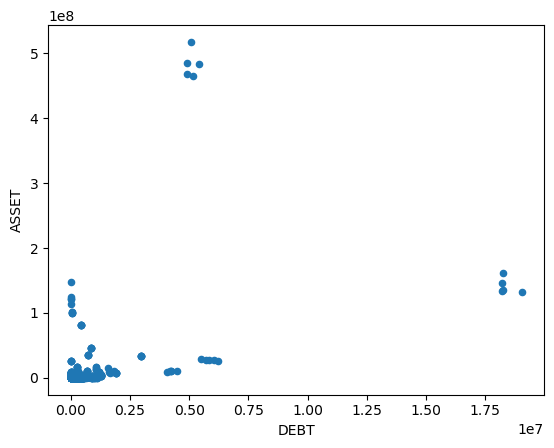

In [20]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot(kind="scatter", x="DEBT", y="ASSET");

You can see relationship in our `df_fear` graph is flatter than the one in our `df` graph, but they clearly are different. 

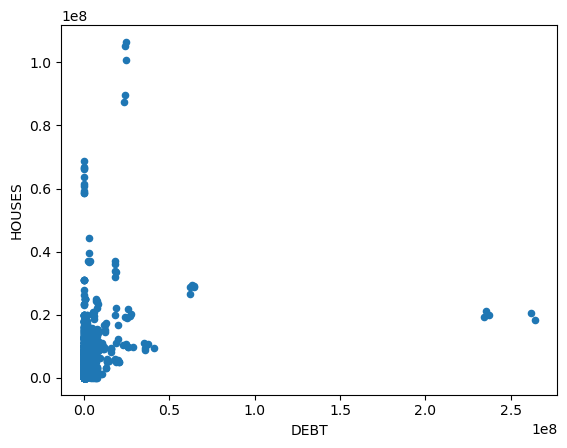

In [21]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot(kind="scatter", x="DEBT", y="HOUSES");

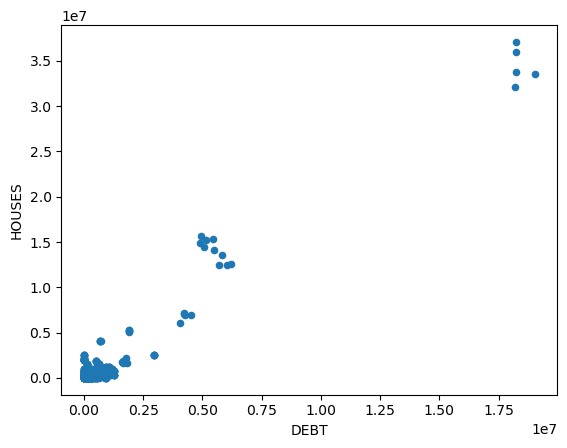

In [22]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot(kind="scatter", x="DEBT", y="HOUSES");

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our `df_fear` graph shows an almost perfect linear relationship, while our `df` graph shows something a little more muddled. You might also notice that the datapoints on the `df_fear` graph form several little groups. Those are called "clusters," and we'll be talking more about how to analyze clustered data in the next lesson.